# Seminar plan
1. Recap the task setting, the baseline solution and the simplest solution that made sense
1. Find out why it's hard to evaluate this solution on new data
1. Pipelines
1. Create a better linear regression model with pipelines

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Seminar-plan" data-toc-modified-id="Seminar-plan-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Seminar plan</a></span></li><li><span><a href="#Task" data-toc-modified-id="Task-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task</a></span><ul class="toc-item"><li><span><a href="#Request" data-toc-modified-id="Request-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Request</a></span></li><li><span><a href="#Solution-plan" data-toc-modified-id="Solution-plan-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Solution plan</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#ML-Task" data-toc-modified-id="ML-Task-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>ML Task</a></span></li></ul></li></ul></li><li><span><a href="#Baseline-solution" data-toc-modified-id="Baseline-solution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline solution</a></span><ul class="toc-item"><li><span><a href="#Evaluate-the-quality" data-toc-modified-id="Evaluate-the-quality-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Evaluate the quality</a></span></li></ul></li><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear regression model</a></span><ul class="toc-item"><li><span><a href="#Build-model" data-toc-modified-id="Build-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Build model</a></span></li><li><span><a href="#Evaluate-model" data-toc-modified-id="Evaluate-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluate model</a></span></li></ul></li><li><span><a href="#Incorporating-more-features" data-toc-modified-id="Incorporating-more-features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Incorporating more features</a></span><ul class="toc-item"><li><span><a href="#Build-model" data-toc-modified-id="Build-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Build model</a></span></li><li><span><a href="#Evaluate-model" data-toc-modified-id="Evaluate-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Evaluate model</a></span></li></ul></li><li><span><a href="#Pipelines" data-toc-modified-id="Pipelines-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pipelines</a></span></li><li><span><a href="#More-features!" data-toc-modified-id="More-features!-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>More features!</a></span></li><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Overfitting</a></span></li><li><span><a href="#Seminar-results" data-toc-modified-id="Seminar-results-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Seminar results</a></span></li></ul></div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

Use the line below if you have high DPI screen and don't want Matplotlib plots to be blurry (e.g., if you work on MacBook Pro series or latest ThinkPads).

In [ ]:
%config InlineBackend.figure_format = 'retina'

# Task

## Request

A local car workshop asked for help. 

One of their services is preparing used cars for sale: washing, polishing, dry cleaning the interior, fixing small but noticeable issues. Depending on the car (and the amount of money the owner is expecting to get), the number of actions may vary. At least, the workshop owner is absolutely sure that prettifying the Mercedes-Benz SL can cost much more than cleaning up the Ford Focus.

Therefore the workshop's revenue highly depends on how precisely the workshop administrator detected the customer's willingness to pay. The workshop owner thinks that **their workshop needs the system that quickly guesses the used car price from the car's basic characteristics**. Such a system on the workshop administrator's computer will help administrators to evaluate the customer's willingness to pay much more precisely -- and will even help car owners.

The Russian start-up founded from this idea: https://maxposter.ru

## Solution plan

Let's build! We need **the system that quickly guesses the used car price from the car's basic characteristics**.

### Dataset
The dataset is already collected:

In [ ]:
df = pd.read_csv('../data/cars.csv')

In [ ]:
df.sample(5)

Source: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

\>100K used cars postings from the British used cars site.

- **brand** car manufacturer
- **model** car model
- **year** registration year
- **transmission** type of gearbox (Manual, Semi-Auto, Automatic, Other)
- **mileage** distance used, miles
- **fuelType** engine fuel type (Diesel, Petrol, Hybrid, Electric, Other)
- **tax** road tax, £
- **mpg** miles per gallon (how many miles car can cover using 1 gallon of fuel; more miles -- less money spent on fuel)
- **engineSize** engine size (volume) in litres
- **tax(£)** road tax, £
- **price** car price, £

In [ ]:
df.loc[df.price.sort_values()[-5:].index]

### ML Task

- Example: used car offer
- Target (dependent) variable: **price**
- Quality measure: RMSE

# Baseline solution

In [ ]:
def get_price_baseline(car):
    return df.price.mean()

## Evaluate the quality

In [ ]:
test_data = [
  {
    "brand": "audi",
    "model": " Q3",
    "year": 2019.0,
    "transmission": "Automatic",
    "mileage": 8000,
    "fuelType": "Diesel",
    "tax": 150.0,
    "mpg": 47.1,
    "engineSize": 2.0
  },
  {
    "brand": "Mercedes-Benz",
    "model": " A Class",
    "year": 2017.0,
    "transmission": "Manual",
    "mileage": 43666,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 49.6,
    "engineSize": 1.6
  },
  {
    "brand": "focus",
    "model": " Focus",
    "year": 2018.0,
    "transmission": "Manual",
    "mileage": 13470,
    "fuelType": "Diesel",
    "engineSize": 1.5
  },
  {
    "brand": "audi",
    "model": " A3",
    "year": 2019.0,
    "transmission": "Semi-Auto",
    "mileage": 6777,
    "fuelType": "Petrol",
    "tax": 150.0,
    "mpg": 42.2,
    "engineSize": 1.5
  },
  {
    "brand": "Mercedes-Benz",
    "model": " A Class",
    "year": 2017.0,
    "transmission": "Semi-Auto",
    "mileage": 5226,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 30.4,
    "engineSize": 4.0
  },
  {
    "brand": "Mercedes-Benz",
    "model": " A Class",
    "year": 2019.0,
    "transmission": "Automatic",
    "mileage": 4500,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 36.7,
    "engineSize": 2.0
  },
  {
    "brand": "Hyundai",
    "model": " I10",
    "year": 2017.0,
    "transmission": "Manual",
    "mileage": 11997,
    "fuelType": "Petrol",
    "mpg": 60.1,
    "engineSize": 1.0,
    "tax(\u00a3)": 145.0
  },
  {
    "brand": "Mercedes-Benz",
    "model": " C Class",
    "year": 2014.0,
    "transmission": "Semi-Auto",
    "mileage": 27032,
    "fuelType": "Diesel",
    "tax": 30.0,
    "mpg": 64.2,
    "engineSize": 2.1
  },
  {
    "brand": "Mercedes-Benz",
    "model": " SL CLASS",
    "year": 2019.0,
    "transmission": "Automatic",
    "mileage": 767,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 29.4,
    "engineSize": 3.0
  },
  {
    "brand": "ford",
    "model": " Focus",
    "year": 2018.0,
    "transmission": "Manual",
    "mileage": 9999,
    "fuelType": "Petrol",
    "tax": 145.0,
    "mpg": 57.7,
    "engineSize": 1.0
  }
]

Quality measure: RMSE

In [ ]:
def rmse(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.sqrt(((y_true - y_pred)**2).sum() / len(y_true))

In [ ]:
test_answers = [27400, 15100, 12990, 23490, 75089, 36990, 7495, 16450, 59899, 13500]

In [ ]:
test_predictions = [get_price_baseline(car) for car in test_data]
test_predictions

In [ ]:
rmse(y_true=test_answers, y_pred=test_predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=test_answers, y_pred=test_predictions, squared=False)

# Linear regression model

<span style="color:red">New content starts here.</span>

## Build model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

To build (one of) the simplest working LR models, we need to:
1. select only numeric features
2. drop incomplete examples

In [ ]:
numeric_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
complete_examples = df[numeric_features].notna().all(axis='columns')
X = df[numeric_features][complete_examples]
y = df.price[complete_examples]

In [ ]:
X.sample(5)

In [ ]:
lr.fit(X, y)

In [ ]:
mean_squared_error(y, lr.predict(X), squared=False)

## Evaluate model

In [ ]:
test_df = pd.DataFrame(test_data)
test_df

In [ ]:
lr.predict(test_df)

To evaluate the model quality on the test data, we need to convert it to the same shape as training data. I.e.,
1. select only numeric features
2. drop incomplete examples

Except that we cannot drop incomplete examples.

In [ ]:
X_test = test_df[numeric_features]
X_test

The simplest way to replace NA values is to replace them with average values. As we saw on the today's test, this may be not the bestt choice.

In [ ]:
na_replacements = df[numeric_features].mean().to_dict()
na_replacements

In [ ]:
X_test = test_df[numeric_features].fillna(na_replacements)
X_test

In [ ]:
test_predictions = lr.predict(X_test)
test_predictions

In [ ]:
rmse(y_true=test_answers, y_pred=test_predictions)

Possible directions to build a better model:

- work more carefully with missing values
- work more carefully with feature scales
- incorporate more features in the model
- optimize regression coefficients (using L1 or L2 regularization)

# Incorporating more features

## Build model

In [ ]:
numeric_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
complete_examples = df[numeric_features].notna().all(axis='columns')
X = df[numeric_features][complete_examples]
y = df.price[complete_examples]
X.tail(3)

There are features that definitely influence the car's price and are not included in the model, like `fuelType`:

In [ ]:
sns.stripplot(
    data=df.sample(300), x='fuelType', y='price', 
#     order=['Manual', 'Semi-Auto', 'Automatic']
)
# plt.yscale('log')

We will use one-hot encoding technique to encode these features. This is not the only one: ordinal encoding and target encoding are also possible for this feature ([brief explanation](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64), [OHE API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder), [ordinal API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder), [target API](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)).

In [ ]:
nominal_features = ['fuelType']
df[nominal_features].tail(3)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(
    sparse=False, 
    drop='first'
).fit(df[nominal_features])
ohe.transform(df[nominal_features])

In [ ]:
X = np.hstack([
    df[numeric_features][complete_examples],
    ohe.transform(df[nominal_features][complete_examples])
])
X[-3:]

In [ ]:
lr.fit(X, y)

## Evaluate model

In [ ]:
mean_squared_error(y, lr.predict(X), squared=False)

Better than 5440! But what's on the test set?

In [ ]:
lr.predict(X_test)

Once again, to prepare test data, we need to process it in the same way as train data:
1. select only numeric features
2. replace NA values in incomplete examples
3. add OHE for `transmission` feature

***Task***: evaluate the model's quality on the test data

In [ ]:
mean_squared_error(y_pred=lr.predict(X_test), y_true=test_answers, squared=False)

Again, better than 11714!

# Pipelines

Data preprocessing scheme:
1. select only numeric features
2. replace NA values in incomplete examples
3. add OHE for `transmission` feature

Can it be simpler?

In [ ]:
!pip install sklearn-pandas

In [ ]:
from sklearn_pandas import DataFrameMapper

In [ ]:
mapper = DataFrameMapper([
    (numeric_features, None),
    (nominal_features, OneHotEncoder(sparse=False, drop='first'))
])
mapper.fit_transform(df)

In [ ]:
mapper.transform(test_df)

Some hacks to make the output more readable + handling missing values:

In [ ]:
from sklearn.impute import SimpleImputer
mapper = DataFrameMapper(
    [([feature], SimpleImputer()) for feature in numeric_features] + [
    (nominal_features, OneHotEncoder(sparse=False, drop='first'))
], df_out=True)
mapper.fit_transform(df)

In [ ]:
mapper.transform(test_df)

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
numeric_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
nominal_features = ['fuelType']
mapper = DataFrameMapper(
    [([feature], SimpleImputer()) for feature in numeric_features] + [
    (nominal_features, OneHotEncoder(sparse=False, drop='first'))
], df_out=True)

pipe = make_pipeline(
    mapper,
    LinearRegression()
)
pipe.fit(df[complete_examples], df.price[complete_examples])

In [ ]:
mean_squared_error(df.price[complete_examples], pipe.predict(df[complete_examples]), squared=False)

In [ ]:
mean_squared_error(test_answers, pipe.predict(test_df), squared=False)

# More features!

In [ ]:
df.sample(3)

***Task***: add `brand` and `model` features to the model

# Overfitting

In [ ]:
lr = pipe.named_steps['linearregression']
mapper = pipe.named_steps['dataframemapper']

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
ax.stem(mapper.transformed_names_, np.abs(lr.coef_))
ax.set_xticklabels(mapper.transformed_names_, ha='left', rotation=-60, fontsize='x-small');

In [ ]:
from sklearn.linear_model import ElasticNet
pipe = make_pipeline(
    mapper,
    ElasticNet(alpha=.7, l1_ratio=.9)
)
pipe.fit(df[complete_examples], df.price[complete_examples])

In [ ]:
mean_squared_error(df.price[complete_examples], pipe.predict(df[complete_examples]), squared=False)

In [ ]:
mean_squared_error(test_answers, pipe.predict(test_df), squared=False)

What are the optimal values of regularization parameters?

# Seminar results

What did we talk about:
- why evaluation is important (again)
- how to iterate quicker with different models and preprocessing

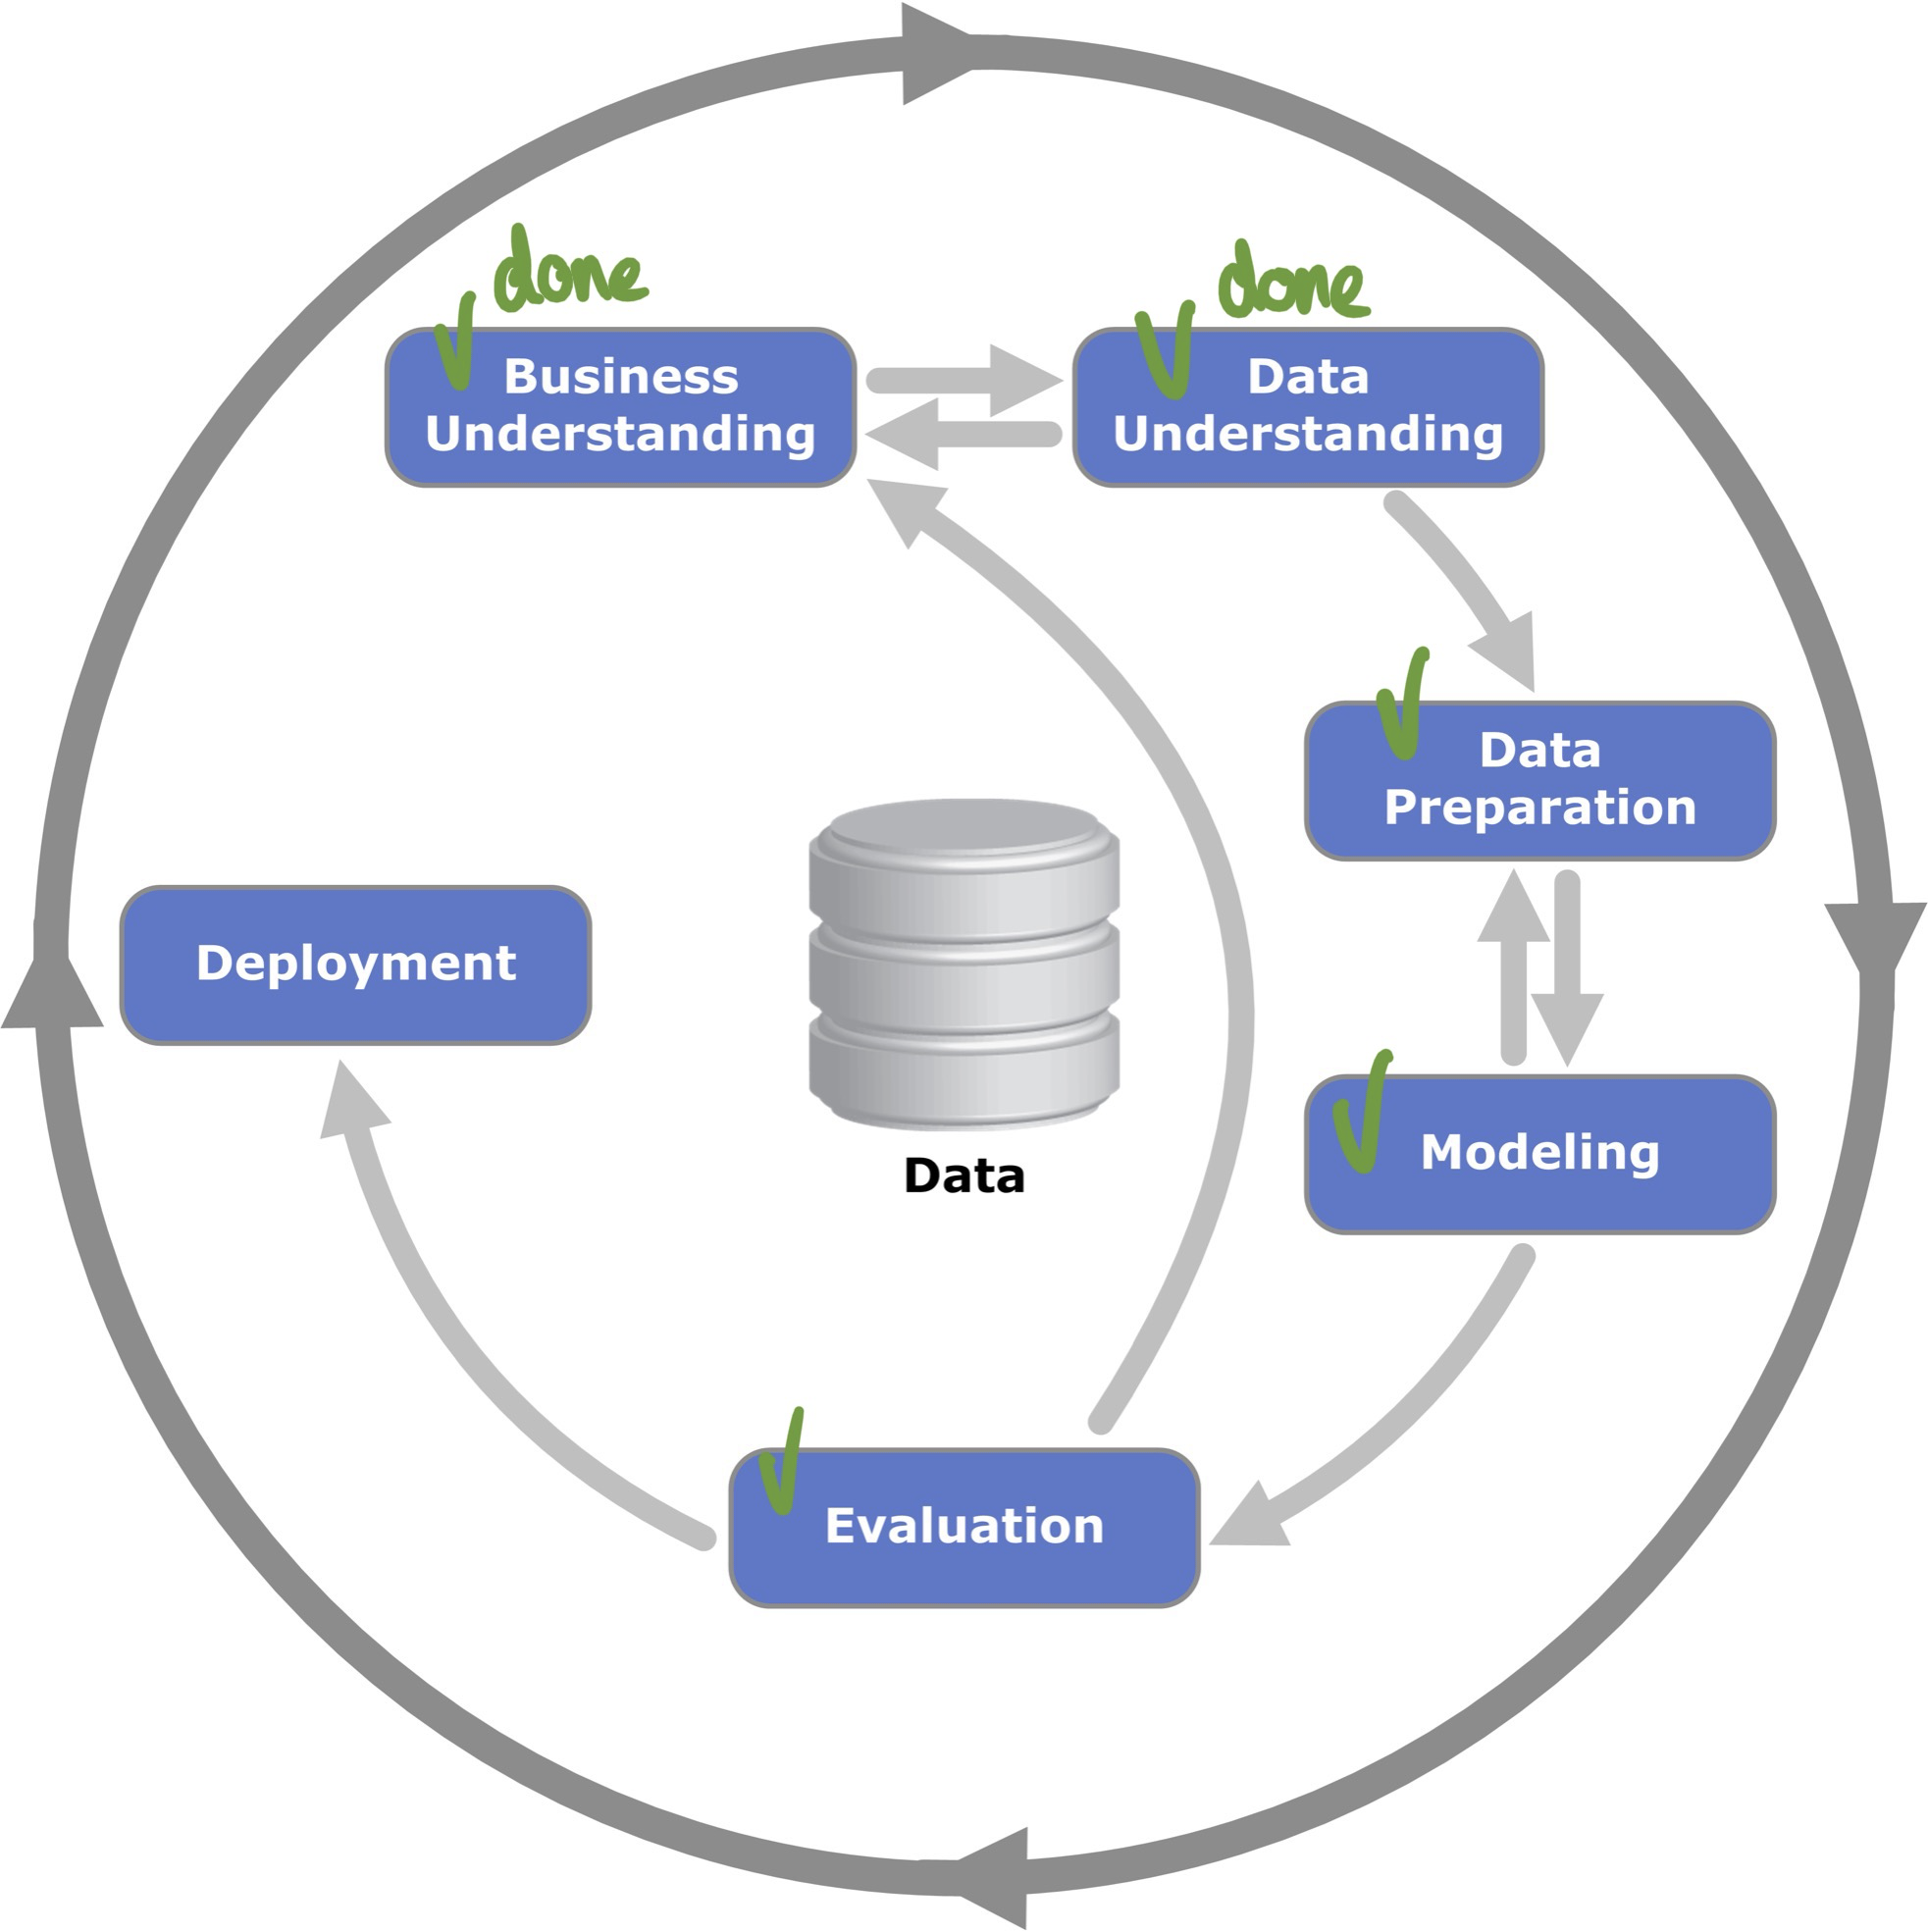